In [4]:
import pandas as pd
datos=pd.read_csv("../Datos/mac.csv")
datos

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


## Naive Bayes Gaussiano VS Regresión logística    

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(datos.iloc[:,0:3],datos.iloc[:,4],
                                                    test_size=0.2,
                                                    random_state=42)

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
gnb=GaussianNB()
losgistica=LogisticRegression(max_iter=1000)

In [15]:
gnb.fit(X_train,y_train)
losgistica.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [16]:
y1_pred=gnb.predict(X_test)
y2_pred=losgistica.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y1_pred)

array([[10,  1,  5],
       [ 1,  3,  8],
       [ 1,  1,  4]])

In [21]:
confusion_matrix(y_test,y2_pred)

array([[13,  0,  3],
       [ 8,  0,  4],
       [ 2,  1,  3]])

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.83      0.62      0.71        16
           1       0.60      0.25      0.35        12
           2       0.24      0.67      0.35         6

    accuracy                           0.50        34
   macro avg       0.56      0.51      0.47        34
weighted avg       0.65      0.50      0.52        34



In [24]:
print(classification_report(y_test,y2_pred))

              precision    recall  f1-score   support

           0       0.57      0.81      0.67        16
           1       0.00      0.00      0.00        12
           2       0.30      0.50      0.38         6

    accuracy                           0.47        34
   macro avg       0.29      0.44      0.35        34
weighted avg       0.32      0.47      0.38        34



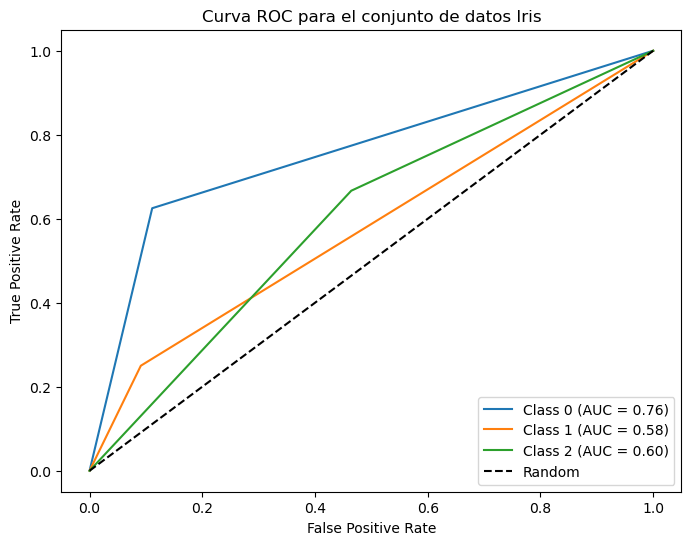

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import seaborn as sns
import matplotlib.pyplot as plt


y_test_df=pd.get_dummies(y_test)
y_score_1 = gnb.predict(X_test)
y_score=pd.get_dummies(y_score_1)
# Calcular las curvas ROC y el área bajo la curva (AUC) para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Tres clases en el conjunto de datos Iris
    fpr[i], tpr[i], _ = roc_curve(y_test_df.iloc[:,i], y_score.iloc[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para ')
plt.legend(loc='lower right')
plt.show()

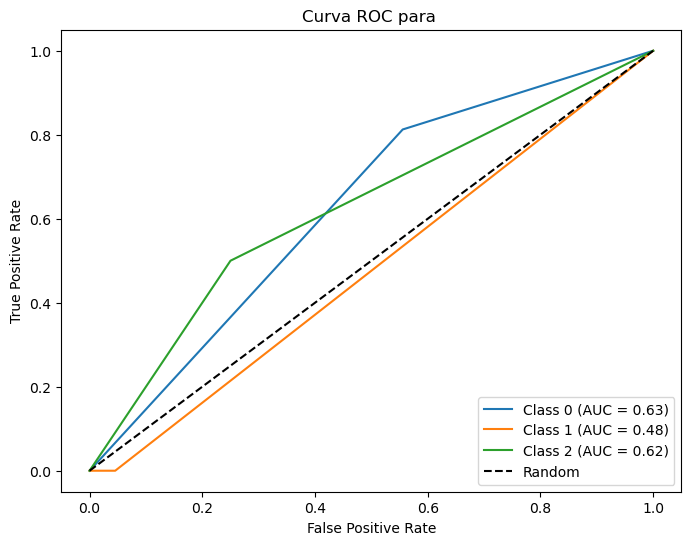

In [31]:

y_test_df=pd.get_dummies(y_test)
y_score_1 = losgistica.predict(X_test)
y_score=pd.get_dummies(y_score_1)
# Calcular las curvas ROC y el área bajo la curva (AUC) para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Tres clases en el conjunto de datos Iris
    fpr[i], tpr[i], _ = roc_curve(y_test_df.iloc[:,i], y_score.iloc[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para ')
plt.legend(loc='lower right')
plt.show()